In [1]:
from pymongo import MongoClient
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import folium

## 1. ANALYSIS OF LOCATION FOR GAMING RELATED COMPANIES 

This information gives us a glimpse of where are the good markets due to the location of gaming companies headquarters.

In [18]:
gaming_df = pd.read_csv('../data/video_games_companies_cleaned.csv')

In [19]:
gaming_df

,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude
0,Flektor,games_video,NaN,$0,USA,Culver City,"8536 National Blvd, Suite A",90232,34.025958,-118.379768
1,Lala,games_video,NaN,$44.2M,USA,Palo Alto,209 Hamilton Ave,94301,37.451151,-122.154369
2,Joost,games_video,0.0,$45M,USA,New York,100 5th Ave Fl 6,10011-6903,40.746497,-74.009447
3,Babelgum,games_video,NaN,$13.2M,GBR,London,NaN,NaN,53.344104,-6.267494
4,Sparter,games_video,NaN,$0,USA,NaN,NaN,NaN,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...
834,G5 Entertainment,games_video,107.0,$0,UKR,Kharkov,"Moskovskiy prospekt, 179-B",61037,NaN,NaN
835,Rev Media,games_video,NaN,$0,USA,Dallas,NaN,NaN,NaN,NaN
836,Fictionaut,games_video,2.0,$0,USA,Astoria,32-14 42nd St,11103,40.759795,-73.916127
837,Tiny Speck,games_video,45.0,$17.2M,CAN,Vancouver,163 Hastings St W,BC V6B 1H5,49.282455,-123.109217


In [20]:
gaming_country_counts = gaming_df['country_code'].value_counts().head(10)

# Convert the Series to a DataFrame
top_10_countries_gaming_df = gaming_country_counts.reset_index()
top_10_countries_gaming_df.columns = ['Country', 'Number of Companies']

top_10_countries_gaming_df

,Country,Number of Companies
0,USA,534
1,GBR,62
2,CAN,35
3,FRA,23
4,DEU,22
5,ISR,19
6,CHN,14
7,JPN,13
8,ESP,12
9,IND,12


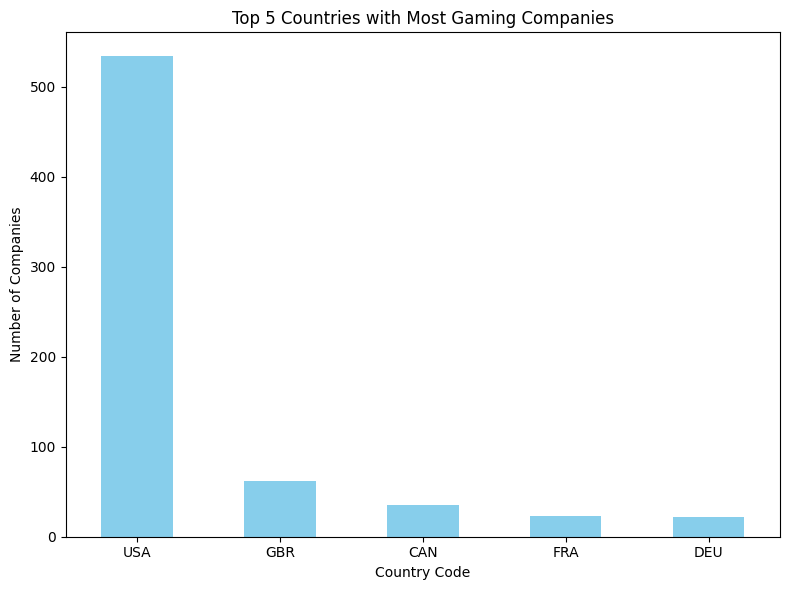

In [21]:
# Count the number of occurrences of each country in the DataFrame
top_5_gaming_countries_plot = gaming_df['country_code'].value_counts().head(5)

# Generate the bar plot
plt.figure(figsize=(8, 6))
top_5_gaming_countries_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Gaming Companies')
plt.xlabel('Country Code')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


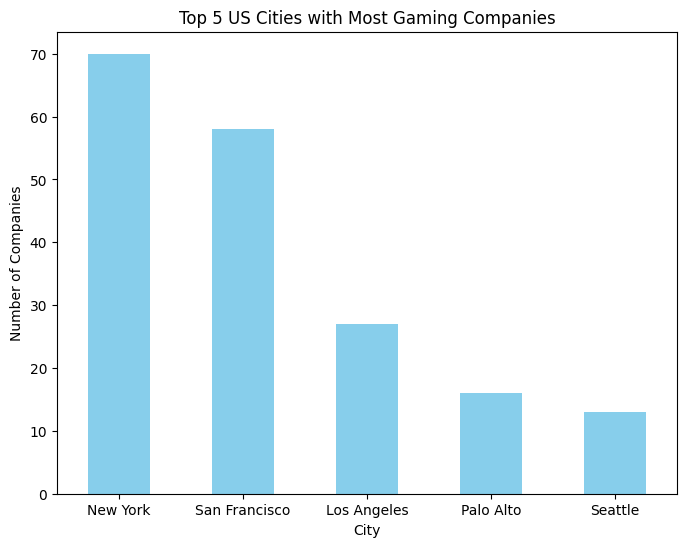

In [22]:
# First, let's filter for companies in the US
top_us_gaming_cities = gaming_df[gaming_df['country_code'] == 'USA']

# Now, we calculate the value counts for the 'city' column for US companies
top_5_us_gaming_cities_plot = top_us_gaming_cities['city'].value_counts().head(5)

# Now we'll create the bar plot using matplotlib
plt.figure(figsize=(8, 6))
top_5_us_gaming_cities_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 US Cities with Most Gaming Companies')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.show()

## 2. ANALYSIS OF EMPLOYEES REQUIREMENTS AND LOCATIONS

This first analysis for employees requirements will attemp to fullfill the expectations for the major percentage of employees.

In [15]:
# Define the requirements as a list of dictionaries
requirements = [
    {"Employee Group": "Designers", "Requirement": "Design Community", "% of Employees": 23},
    {"Employee Group": "UI/UX Engineers", "Requirement": "Design Community", "% of Employees": 6},
    {"Employee Group": "Frontend Developers", "Requirement": "Tech Environment", "% of Employees": 11.5},
    {"Employee Group": "Data Engineers", "Requirement": "Tech Environment", "% of Employees": 17},
    {"Employee Group": "Backend Developers", "Requirement": "Tech Environment", "% of Employees": 6},
    {"Employee Group": "Account Managers", "Requirement": "Accessibility", "% of Employees": 23},
     {"Employee Group": "Maintenance Personnel", "Requirement": "Recreational Facilities", "% of Employees": 1},
    {"Employee Group": "Executives", "Requirement": "Starbucks", "% of Employees": 11.5},
    {"Employee Group": "CEO/President", "Requirement": "Vegan Restaurant", "% of Employees": 1}]
    

# Create a DataFrame from the list of dictionaries
requirements_df = pd.DataFrame(requirements)
requirements_df


,Employee Group,Requirement,% of Employees
0,Designers,Design Community,23.0
1,UI/UX Engineers,Design Community,6.0
2,Frontend Developers,Tech Environment,11.5
3,Data Engineers,Tech Environment,17.0
4,Backend Developers,Tech Environment,6.0
5,Account Managers,Accessibility,23.0
6,Maintenance Personnel,Recreational Facilities,1.0
7,Executives,Starbucks,11.5
8,CEO/President,Vegan Restaurant,1.0


By looking what countries/cities have more design companies or companies that have raised more than $1M, I saw there are only 4 design companies in the dataset but I can still fullfill the requirements of 33.5% of employees. 

In [24]:
required_companies_df = pd.read_csv('../data/required_companies.csv')

In [25]:
required_companies_df

,name,category_code,total_money_raised,country_code,city,address,zip_code,latitude,longitude
0,Digg,news,$45M,USA,San Francisco,135 Mississippi St,94107,37.764726,-122.394523
1,Joost,games_video,$45M,USA,New York,100 5th Ave Fl 6,10011-6903,40.746497,-74.009447
2,SpinVox,messaging,$106M,GBR,Buckinghamshire,"Wethered House, Pound Lane",SL7 2AF,NaN,NaN
3,AddThis,advertising,$73M,USA,Vienna,1595 Spring Hill Road,22182,38.926172,-77.245195
4,Mahalo,web,$21M,USA,Culver City,3525 Eastham Dr.,90232,34.017606,-118.487267
...,...,...,...,...,...,...,...,...,...
1651,Luminus Devices,other,$136M,USA,Billerica,1100 Technology Park Drive,01821,42.528635,-71.278022
1652,Cameron Health,medical,$121M,USA,San Clemente,905 Calle Amanecer,92673,33.448010,-117.607717
1653,Cantimer,NaN,$2M,USA,Menlo Park,3700 Haven Court,94025,37.484616,-122.181753
1654,Celestial Semiconductor,semiconductor,$2M,USA,San Jose,"2635 North 1st Street, Suite 150",95134,37.386417,-121.929170


In [26]:
required_country_counts = required_companies_df['country_code'].value_counts().head(10)

# Convert the Series to a DataFrame
top_10_required_countries_df = required_country_counts.reset_index()
top_10_required_countries_df.columns = ['Country', 'Number of Companies']

# Now 'top_countries_df' is the DataFrame with the top 10 countries
top_10_required_countries_df

,Country,Number of Companies
0,USA,1274
1,ISR,48
2,CAN,44
3,GBR,41
4,CHN,37
5,IND,26
6,DEU,12
7,FRA,11
8,SGP,7
9,SWE,6


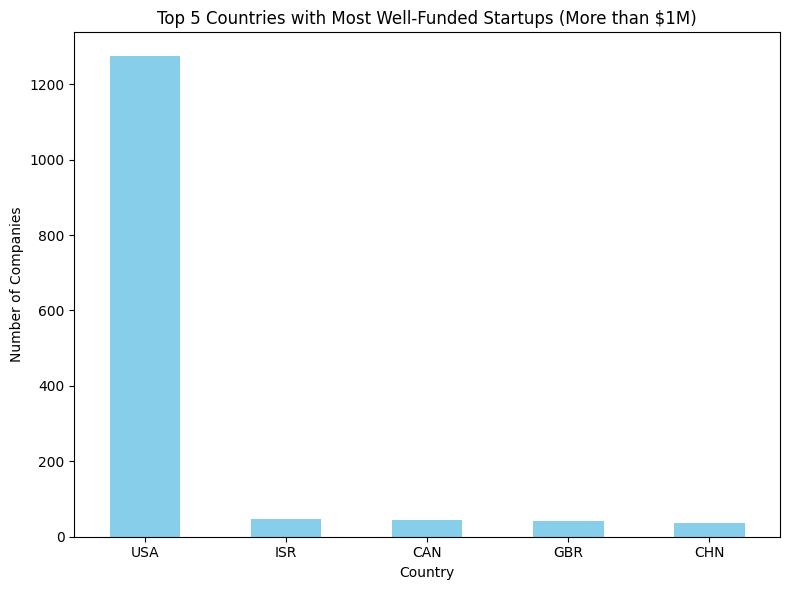

In [27]:
# Count the number of occurrences of each country in the DataFrame
top_5_required_countries_plot = required_companies_df['country_code'].value_counts().head(5)

# Now we'll create the bar plot using matplotlib
plt.figure(figsize=(8, 6))
top_5_required_countries_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Well-Funded Startups (More than $1M)')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()

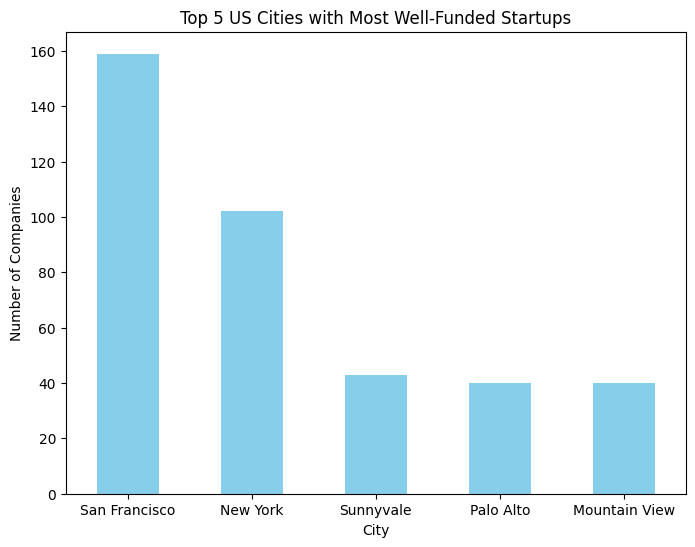

In [32]:
# First, let's filter for companies in the US
top_us_required_cities = required_companies_df[required_companies_df['country_code'] == 'USA']

# Now, we calculate the value counts for the 'city' column for US companies
top_5_us_required_cities_plot = top_us_required_cities['city'].value_counts().head(5)

# Now we'll create the bar plot using matplotlib
plt.figure(figsize=(8, 6))
top_5_us_required_cities_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 US Cities with Most Well-Funded Startups')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.show()

In [29]:
design_companies_df = pd.read_csv('../data/design_companies.csv')

In [30]:
design_country_counts = design_companies_df['country_code'].value_counts().head(10)

# Convert the Series to a DataFrame
top_10_design_countries_df = design_country_counts.reset_index()
top_10_design_countries_df.columns = ['Country', 'Number of Companies']

top_10_design_countries_df

,Country,Number of Companies
0,USA,289
1,GBR,56
2,IND,50
3,CAN,23
4,AUS,15
5,DEU,10
6,FRA,9
7,NLD,9
8,IRL,9
9,ARG,8


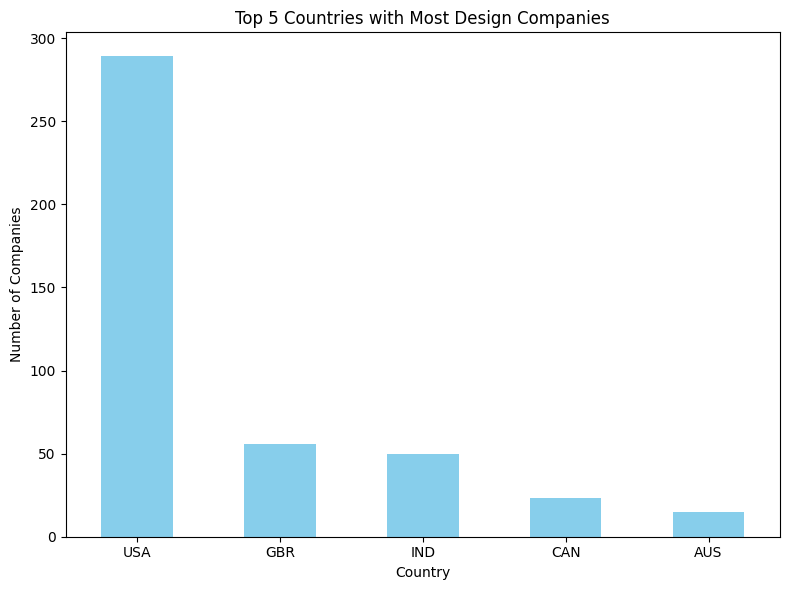

In [31]:
# Count the number of occurrences of each country in the DataFrame
top_5_design_countries_plot = design_companies_df['country_code'].value_counts().head(5)

# Now we'll create the bar plot using matplotlib
plt.figure(figsize=(8, 6))
top_5_design_countries_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Design Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()

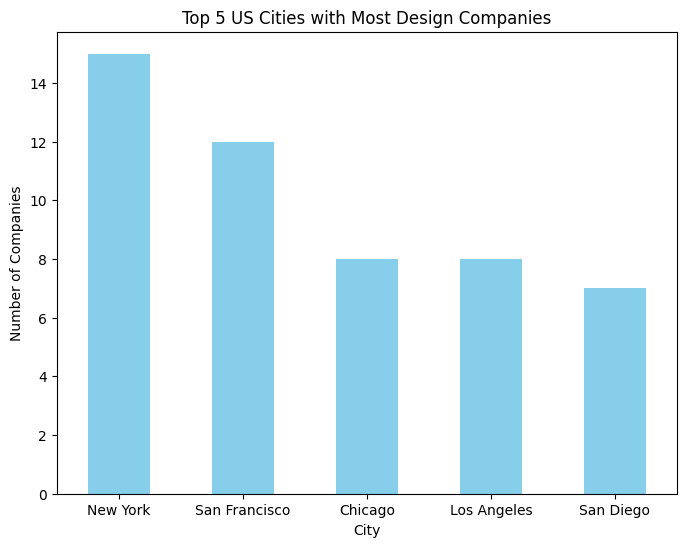

In [34]:
# First, let's filter for companies in the US
top_us_design_cities = design_companies_df[design_companies_df['country_code'] == 'USA']

# Now, we calculate the value counts for the 'city' column for US companies
top_5_us_design_cities_plot = top_us_design_cities['city'].value_counts().head(5)

# Now we'll create the bar plot using matplotlib
plt.figure(figsize=(8, 6))
top_5_us_design_cities_plot.plot(kind='bar', color='skyblue')
plt.title('Top 5 US Cities with Most Design Companies')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.show()

#### The country selected is USA because in both Analysis USA is the country with much more companies than other countries. The cities with more companies in both analysis are: San Francisco, New York and Palo Alto.

## 3. COMPANIES IN THE US: 

In [38]:
usa_companies_df = pd.read_csv('../data/usa_companies_cleaned.csv')

In [39]:
usa_companies_df

,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude
0,Wetpaint,web,47.0,$39.8M,USA,Seattle,710 - 2nd Avenue,98104,47.603122,-122.333253
1,AdventNet,enterprise,600.0,$0,USA,Pleasanton,4900 Hopyard Rd.,94588,37.692934,-121.904945
2,Zoho,software,1600.0,$0,USA,Pleasanton,4900 Hopyard Rd,94588,37.692934,-121.904945
3,Digg,news,60.0,$45M,USA,San Francisco,135 Mississippi St,94107,37.764726,-122.394523
4,Facebook,social,5299.0,$2.43B,USA,Menlo Park,1601 Willow Road,94025,37.416050,-122.151801
...,...,...,...,...,...,...,...,...,...,...
9050,Contemporary Computer Services,software,NaN,$0,USA,Bohemia,200 Knickerbocker Avenue,11716,40.775055,-73.088140
9051,QSGI,software,164.0,$0,USA,Palm Beach,400 Royal Palm Way,33480,26.705331,-80.041395
9052,AfterLogic,software,NaN,$0,USA,Livingston,P.O. Box 2096,07039,40.793024,-74.323554
9053,EnteGreat Solutions,software,NaN,$0,USA,Birmingham,NaN,NaN,33.518885,-86.816068


In [41]:
# Define the cities of interest
cities_of_interest = ['San Francisco', 'New York', 'Palo Alto']

# Filter the dataframe for companies in the specified cities
filtered_companies_df = usa_companies_df[usa_companies_df['city'].isin(cities_of_interest)]

# Show the filtered data
filtered_companies_df.reset_index(drop=True, inplace=True)
filtered_companies_df


,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude
0,Digg,news,60.0,$45M,USA,San Francisco,135 Mississippi St,94107,37.764726,-122.394523
1,Twitter,social,1300.0,$1.16B,USA,San Francisco,1355 Market St.,94103,37.776805,-122.416924
2,StumbleUpon,web,NaN,$18.5M,USA,San Francisco,NaN,NaN,37.775196,-122.419204
3,Scribd,news,50.0,$25.8M,USA,San Francisco,539 Bryant Street,94107,37.789634,-122.404052
4,Lala,games_video,NaN,$44.2M,USA,Palo Alto,209 Hamilton Ave,94301,37.451151,-122.154369
...,...,...,...,...,...,...,...,...,...,...
1590,Email Data Source,NaN,NaN,$552k,USA,New York,"65 Broadway, Suite 601",10006,40.707158,-74.012163
1591,Vertro,software,50.0,$250k,USA,New York,143 Varick Street,10013,40.726160,-74.006023
1592,ALOT,software,50.0,$0,USA,New York,143 Varick Street,10013,40.726160,-74.006023
1593,Nellix,NaN,NaN,$6.5M,USA,Palo Alto,2465-B Faber Place,94303,37.449972,-122.116178


In [42]:
# Further filter the dataframe for companies with number of employees between 90 and 120
filtered_companies_by_employees_df = filtered_companies_df[
    filtered_companies_df['number_of_employees'].between(90, 120, inclusive='both')]

filtered_companies_by_employees_df


,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude
15,Livestream,games_video,120.0,$14.7M,USA,New York,"111 8th Avenue, #1509",10011,40.726155,-73.995625
50,PowerReviews,social,120.0,$40.1M,USA,San Francisco,22 4th Street,94103,37.779558,-122.393041
51,hi5,games_video,100.0,$52M,USA,San Francisco,55 Second Street,94105,37.788668,-122.400558
109,Greystripe,advertising,90.0,$17.6M,USA,San Francisco,160 Spear Street Fl 14,94105,37.710677,-122.393230
172,EchoSign,web,100.0,$8.5M,USA,Palo Alto,"555 Bryant Street, #101",94301,37.445326,-122.160671
201,Ingenio,advertising,120.0,$0,USA,San Francisco,PMB #331,94105,NaN,NaN
204,TrustedID,security,120.0,$25M,USA,Palo Alto,395 Page Mill Road,94306,37.520592,-122.255907
254,Zynga,games_video,115.0,$860M,USA,San Francisco,365 Vermont St.,94103,37.765158,-122.404234
255,Smaato,advertising,95.0,$18M,USA,San Francisco,"240 Stockton St, 10th Floor",94108,NaN,NaN
282,Mixbook,web,90.0,$11M,USA,Palo Alto,409 Sherman Ave,94306-1827,37.383844,-121.918319


In [43]:
filtered_companies_by_employees_df['category_code'].unique()

array(['games_video', 'social', 'advertising', 'web', 'security',
       'design', 'software', 'hardware', 'mobile', 'enterprise', nan,
       'network_hosting', 'ecommerce', 'legal', 'other', 'finance',
       'news'], dtype=object)

## *I will prioritize the offices in the games_video category that may already have the desire distribution.

In [48]:
# Filter the already filtered data by the category code 'games_video'
pre_selected_companies_df = filtered_companies_by_employees_df[
    filtered_companies_by_employees_df['category_code'] == 'games_video']

pre_selected_companies_df

,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude
15,Livestream,games_video,120.0,$14.7M,USA,New York,"111 8th Avenue, #1509",10011,40.726155,-73.995625
51,hi5,games_video,100.0,$52M,USA,San Francisco,55 Second Street,94105,37.788668,-122.400558
254,Zynga,games_video,115.0,$860M,USA,San Francisco,365 Vermont St.,94103,37.765158,-122.404234
588,iWin,games_video,103.0,$0,USA,San Francisco,45 Fremont Street,94105,37.781689,-122.391061
1537,Exent,games_video,100.0,$3M,USA,New York,632 W. 28th St.,10001,40.752380,-74.005568


In [49]:
pre_selected_companies_df.to_csv('../data/pre_selected_companies.csv', index=False)

## * I will decide the city based in where are more companies value in more than $1M

In [52]:
million_dollar_comapanies_df = pd.read_csv('../data/all_companies_cleaned_df.csv')

In [53]:
# Count the number of companies in each city
city_counts = million_dollar_comapanies_df['city'].value_counts()

# Find the city with the most companies
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

top_city, top_city_count

('San Francisco', 134)

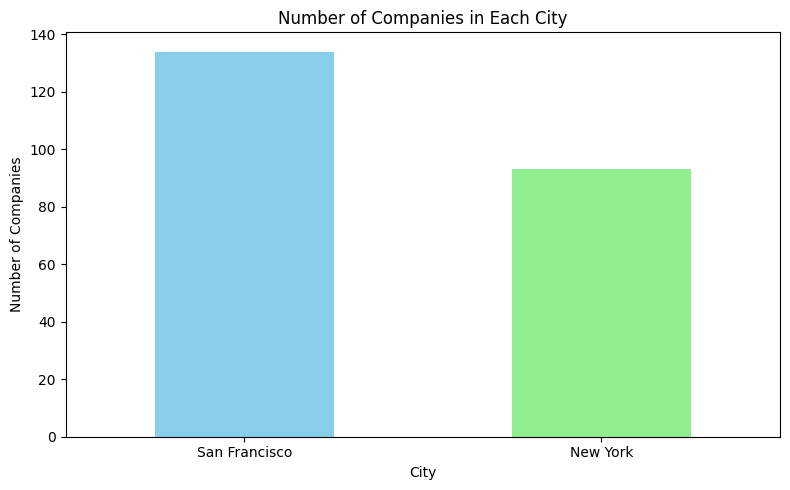

In [54]:
# Since there are only two cities, we can plot them directly
# Plot a bar chart for the two cities
plt.figure(figsize=(8, 5))
city_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Companies in Each City')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

## FINALISTS: COMPANIES IN SAN FRANCISCO

In [65]:
# Filter the dataframe for companies located in San Francisco
sf_companies = million_dollar_comapanies_df[million_dollar_comapanies_df['city'] == 'San Francisco']

sf_companies.to_csv('../data/san_francisco_companies.csv', index=False)

sf_companies


,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude,Company_Type
1,hi5,games_video,100.0,$52M,USA,San Francisco,55 Second Street,94105,37.788668,-122.400558,Pre-selected
2,Zynga,games_video,115.0,$860M,USA,San Francisco,365 Vermont St.,94103,37.765158,-122.404234,Pre-selected
3,iWin,games_video,103.0,$0,USA,San Francisco,45 Fremont Street,94105,37.781689,-122.391061,Pre-selected
5,Digg,news,NaN,$45M,USA,San Francisco,135 Mississippi St,94107,37.764726,-122.394523,Raised > $1M
7,Prosper,finance,NaN,$120M,USA,San Francisco,101 2nd Street,94105,37.789760,-122.402524,Raised > $1M
...,...,...,...,...,...,...,...,...,...,...,...
215,Recurrent Energy,cleantech,NaN,$85M,USA,San Francisco,300 California St.,94104,37.805289,-122.404448,Raised > $1M
217,Siluria Technologies,nanotech,NaN,$103M,USA,San Francisco,409 Illinois Street,94158,37.448491,-122.180281,Raised > $1M
218,ZoomSystems,hardware,NaN,$87M,USA,San Francisco,"22 4th Street, Floor 16",94103,37.781689,-122.391061,Raised > $1M
224,TeachScape,software,NaN,$16M,USA,San Francisco,71 Stevenson St.,94105,37.786905,-122.404392,Raised > $1M


In [63]:
# Filter the San Francisco dataframe further to include only companies with Company_Type 'Pre-selected'
companies_sf_preselected = sf_companies[sf_companies['Company_Type'] == 'Pre-selected']

companies_sf_preselected.head()


,name,category_code,number_of_employees,total_money_raised,country_code,city,address,zip_code,latitude,longitude,Company_Type
1,hi5,games_video,100.0,$52M,USA,San Francisco,55 Second Street,94105,37.788668,-122.400558,Pre-selected
2,Zynga,games_video,115.0,$860M,USA,San Francisco,365 Vermont St.,94103,37.765158,-122.404234,Pre-selected
3,iWin,games_video,103.0,$0,USA,San Francisco,45 Fremont Street,94105,37.781689,-122.391061,Pre-selected


In [2]:
df = pd.read_csv('../data/san_francisco_companies_cleaned_df.csv')

## 1. FIRST FINALIST: HI5

In [3]:
unique_venues_df = pd.read_csv('../data/unique_venues_df.csv')

In [6]:
# Filter for pre-selected companies using the correct column name and case
preselected_companies_df = df[df['Company_Type'] == 'Pre-selected']

# Calculate the midpoint latitude and longitude
midpoint_latitude = preselected_companies_df['latitude'].mean()
midpoint_longitude = preselected_companies_df['longitude'].mean()

# The midpoint coordinates
midpoint = (midpoint_latitude, midpoint_longitude)
midpoint


(37.778505, -122.39861766666667)

In [9]:

central_latitude = 37.778505
central_longitude = -122.398617

# Create a map centered around the central point
map_hi5 = folium.Map(location=[central_latitude, central_longitude], zoom_start=13)

In [10]:
preselected_companies_df = df[df['Company_Type'] == 'Pre-selected']
# Add markers for pre-selected companies
for idx, row in preselected_companies_df.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['name']} ({row['category_code']})",
        icon=folium.Icon(color='red', icon='briefcase'),
         z_index_offset=1000
    ).add_to(map_hi5)
map_hi5

In [11]:
other_companies = df[df['Company_Type'] != 'Pre-selected']

# Add markers for other companies
for idx, row in other_companies.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='briefcase')
    ).add_to(map_hi5)


In [12]:
category_colors = {
    'karaoke': 'purple',
    'bars': 'purple',
    'clubs': 'purple',
    'starbucks': 'green',
    'vegan restaurants': 'orange',
    'elementary school': 'black',
    'basketball stadium': 'darkred',
    'veterinay':'pink',
    'pet grooming': 'pink'
}

# Define a FontAwesome icon for each category
category_to_icon = {
    'karaoke': 'glass',
    'bars': 'glass',
    'clubs': 'glass',
    'starbucks': 'coffee',  # FontAwesome coffee icon for Starbucks
    'vegan restaurants': 'cutlery',
    'elementary school': 'graduation-cap',  # FontAwesome graduation cap icon for schools
    'basketball stadium': 'fa-bullseye',
    'veterinary': 'fa-paw',
    'pet grooming': 'fa-paw',
    'default': 'info-sign'  
}

# Add markers for the venues
for idx, row in unique_venues_df.iterrows():
    # Get the appropriate icon for the category
    icon_name = category_to_icon.get(row['category'], 'default') 

    # Set prefix to 'fa' for FontAwesome icons
    icon_prefix = 'fa' if row['category'] in ['starbucks', 'elementary school', 'basketball stadium','veterinary', 'pet grooming'] else None

    icon = folium.Icon(color=category_colors.get(row['category'], 'gray'),
                       icon=icon_name,
                       prefix=icon_prefix)

    folium.Marker(
        [row['lat'], row['lon']],
        popup=f"{row['name']} ({row['category']})",
        icon=icon
    ).add_to(map_hi5)


In [14]:
# Create dictionary for Montgomery Station
montgomery_station_dict = {
    'name': 'Montgomery Station',
    'address': '598 Market St, San Francisco, CA 94104, United States',
    'city': 'San Francisco',
    'category': 'rail station',
    'distance': 140,
    'lat': 37.7893598,
    'lon': -122.4013317
}

# Append the dictionary to the DataFrame
# First, convert the dictionary to a DataFrame
montgomery_station_df = pd.DataFrame([montgomery_station_dict])

# Then, concatenate it with the existing venues DataFrame
unique_venues_df = pd.concat([unique_venues_df, montgomery_station_df], ignore_index=True)

In [15]:
# Add a marker for Montgomery Station
folium.Marker(
    [montgomery_station_dict['lat'], montgomery_station_dict['lon']],
    popup=f"{montgomery_station_dict['name']} ({montgomery_station_dict['category']})",
    icon=folium.Icon(color='darkblue', icon='info-sign'),  # 'subway' is just an example; choose an appropriate icon
    z_index_offset=1000
).add_to(map_hi5)


In [16]:
import folium

# Assuming `map_hi5` is your Folium map object and `preselected_companies_df` contains your pre-selected companies
for idx, row in preselected_companies_df.iterrows():
    folium.Circle(
        location=(row['latitude'], row['longitude']),
        radius=1000,  # radius in meters
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2
    ).add_to(map_hi5)


In [17]:
map_hi5